/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:297: ConvergenceWarning: Maximum

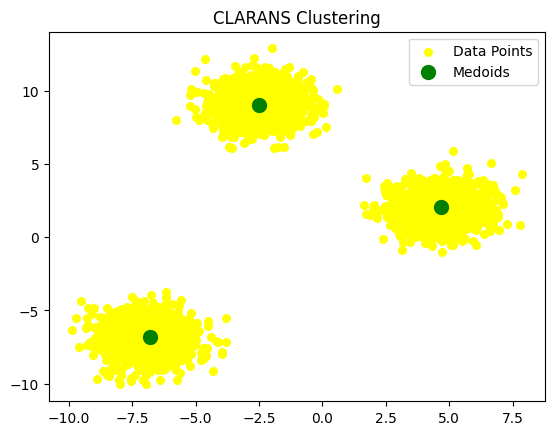

In [4]:
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=3000, centers=3, cluster_std=1, random_state=42)
# above line of code generate some sample spatial clustered data
# n_samples: The total number of points equally divided among clusters.
# centers: The number of centers to generate, or the fixed center locations.
# cluster_std: The standard deviation of the clusters. Larger values spread out the clusters.
# random_state: Seed for random number generation to ensure reproducibility.

def clarans(X, n_clusters, num_local, max_neighbor):
    kmedoids = KMedoids(n_clusters=n_clusters, method='alternate', max_iter=1)
    best_cost = float('inf')
    best_medoids = None
    for _ in range(num_local):
        kmedoids.fit(X)
        medoids = kmedoids.medoid_indices_
        cost = np.sum(np.min(X[medoids] - X[:, np.newaxis], axis=2), axis=1).mean()
        if cost < best_cost:
            best_cost = cost
            best_medoids = medoids
    return best_medoids

k = 3  # <- no. of clusters
num_local = 10
max_neighbor = 10
medoids = clarans(X, k, num_local, max_neighbor)

# plotting the results
plt.scatter(X[:, 0], X[:, 1], c='yellow', marker='o', s=30, label='Data Points')
plt.scatter(X[medoids, 0], X[medoids, 1], c='green', marker='o', s=100, label='Medoids')
plt.title('CLARANS Clustering')
plt.legend()
plt.show()


In [2]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00
